In [15]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


# 1. Nearest neighbor

In [17]:
# limit data for better speed
Xtr, Ytr = mnist.train.next_batch(5000)
Xte, Yte = mnist.test.next_batch(200)

(55000, 784)
(55000, 10)
(200, 784)
(784,)
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


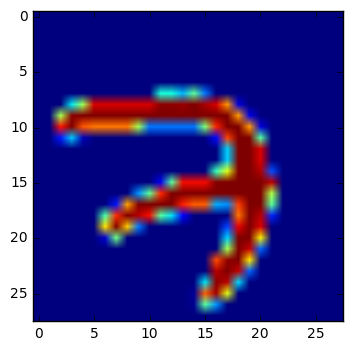

In [18]:
# have a look at data
print mnist.train.images.shape
print mnist.train.labels.shape

print Xte.shape

print Xtr[0].shape
print Ytr[0]

plt.imshow(Xtr[0].reshape((28,28)))


In [19]:
# tf graph input: placeholders
xtr = tf.placeholder('float', [None,784])
xte = tf.placeholder('float', [784])
print xtr
print xte
print tf.add(xtr, xte) # -- tf does auto dimension matching as in np

Tensor("Placeholder_2:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_3:0", shape=(784,), dtype=float32)
Tensor("Add_2:0", shape=(?, 784), dtype=float32)


In [20]:
# define loss function: L1 distance 
'''
tf.abs(tf.add(xtr, tf.neg(xte))) is a ?*784 matrix, loss should be summing over each row 
     ==> reduction_indeices = 1, reduce on dimension 1 (i.e. reduce each row)
'''
lossl1 = tf.reduce_sum( tf.abs(tf.add(xtr, tf.neg(xte))), reduction_indices=1 )
print lossl1

Tensor("Sum_1:0", shape=(?,), dtype=float32)


In [21]:
# define prediction: minimize the loss
pred = tf.argmin(lossl1, 0) # find min on dimension 0
print pred

Tensor("ArgMin_1:0", shape=(), dtype=int64)


In [22]:
# initialize placeholders: in this example we haven't defined any variables so this is not useful
init = tf.initialize_all_variables()

In [23]:
# lauch the graph

with tf.Session() as sess: 
    n_correct = 0.0
    sess.run(init)
    for i in xrange(len(Xte)):# for each test data Xte_i
        # find the nearest one to Xte_i in the training data, and predict this label
        nn_idx = sess.run(pred, feed_dict={xtr:Xtr, xte:Xte[i,:]})
        y_pred, y_true = np.argmax(Ytr[nn_idx,:]), np.argmax(Yte[i,:]) # convert one-hot back to 0~9 label
        print 'test %d, pred=%d, truth=%d' % (i, y_pred, y_true)
        if y_pred==y_true: n_correct += 1
    print 'finish, accuracy=%.4f' % (n_correct/len(Xte))
        
        

test 0, pred=7, truth=7
test 1, pred=2, truth=2
test 2, pred=1, truth=1
test 3, pred=0, truth=0
test 4, pred=4, truth=4
test 5, pred=1, truth=1
test 6, pred=4, truth=4
test 7, pred=9, truth=9
test 8, pred=8, truth=5
test 9, pred=9, truth=9
test 10, pred=0, truth=0
test 11, pred=0, truth=6
test 12, pred=9, truth=9
test 13, pred=0, truth=0
test 14, pred=1, truth=1
test 15, pred=5, truth=5
test 16, pred=4, truth=9
test 17, pred=7, truth=7
test 18, pred=3, truth=3
test 19, pred=4, truth=4
test 20, pred=9, truth=9
test 21, pred=6, truth=6
test 22, pred=6, truth=6
test 23, pred=5, truth=5
test 24, pred=4, truth=4
test 25, pred=0, truth=0
test 26, pred=7, truth=7
test 27, pred=4, truth=4
test 28, pred=0, truth=0
test 29, pred=1, truth=1
test 30, pred=3, truth=3
test 31, pred=1, truth=1
test 32, pred=3, truth=3
test 33, pred=4, truth=4
test 34, pred=7, truth=7
test 35, pred=2, truth=2
test 36, pred=7, truth=7
test 37, pred=1, truth=1
test 38, pred=2, truth=2
test 39, pred=1, truth=1
test 40, p

---

# 2. Linear regression

A very simple 1d linear regression: y = ax+b

In [24]:
rng = np.random

In [25]:
# parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 100

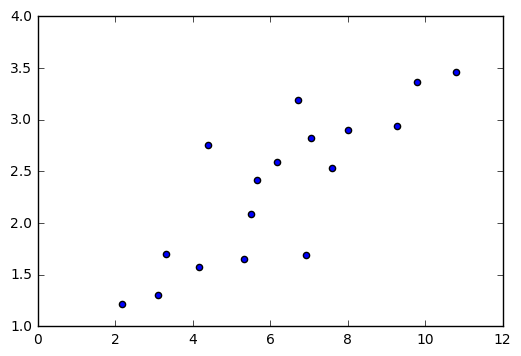

In [26]:
# Training Data
Xtr = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Ytr = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = Xtr.shape[0]

plt.scatter(Xtr, Ytr)

In [27]:
# graph input: placeholder
x = tf.placeholder("float")
y = tf.placeholder("float")
print x, y
print x.get_shape()

Tensor("Placeholder_4:0", dtype=float32) Tensor("Placeholder_5:0", dtype=float32)
<unknown>


In [28]:
# model weights: variable
a = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')
print a, b

<tensorflow.python.ops.variables.Variable object at 0x7fabd12c0150> <tensorflow.python.ops.variables.Variable object at 0x7fabd12c0610>


In [29]:
# linear model: y = ax+b
pred = tf.add(tf.mul(x,a), b)
print pred

Tensor("Add_4:0", dtype=float32)


In [30]:
# define loss: L2 loss
lossl2 = tf.reduce_sum( tf.pow(pred-y,2) ) / 2.0 / n_samples
print lossl2

Tensor("div_1:0", dtype=float32)


In [31]:
# use an optimizer
gdopt = tf.train.GradientDescentOptimizer(learning_rate) 
# if learning_rate too large (ex.0.1), will not converge!!

# let this optimizer minimize the lossl2 (by changing values of Variables):
linreg_opt = gdopt.minimize(lossl2) 

In [32]:
init = tf.initialize_all_variables()

epoch 100, loss=0.1350, a=0.3844, b=-0.1680
epoch 200, loss=0.1224, a=0.3688, b=-0.0561
epoch 300, loss=0.1125, a=0.3550, b=0.0429
epoch 400, loss=0.1048, a=0.3429, b=0.1304
epoch 500, loss=0.0987, a=0.3321, b=0.2079
epoch 600, loss=0.0940, a=0.3226, b=0.2764
epoch 700, loss=0.0903, a=0.3142, b=0.3370
epoch 800, loss=0.0874, a=0.3067, b=0.3906
epoch 900, loss=0.0851, a=0.3001, b=0.4380
epoch 1000, loss=0.0833, a=0.2943, b=0.4800
finish!


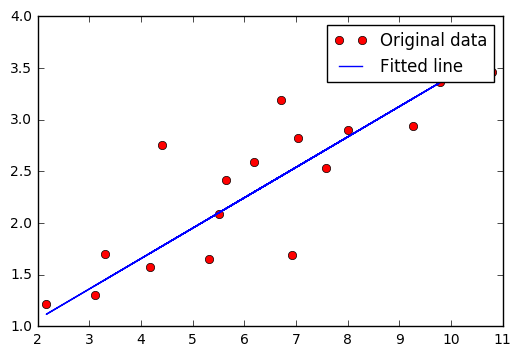

In [33]:
with tf.Session() as sess: 
    sess.run(init)
    for i in xrange(1, training_epochs+1):
        for (xtr, ytr) in zip(Xtr, Ytr): # go over all data
            sess.run(linreg_opt, feed_dict={x:xtr, y:ytr})
#         sess.run(linreg_opt, feed_dict={x:Xtr, y:Ytr})
        if i % display_step == 0:
            _loss = sess.run(lossl2, feed_dict={x:Xtr, y:Ytr})
            print 'epoch %d, loss=%.4f, a=%.4f, b=%.4f' % (i, _loss, sess.run(a), sess.run(b))
    print 'finish!'
    
    plt.plot(Xtr, Ytr, 'ro', label='Original data')
    plt.plot(Xtr, sess.run(a) * Xtr + sess.run(b), label='Fitted line')
    plt.legend()
    plt.plot()
            

---

# 3. Logistic regression

Multi-class logistic regression on the mnist dataset:

class output = softmax(logits)

For class-c, its logit is: 

$logit_c = W_c x + b_c$

So all 10 logits can be written as: 

$ logit = W x + b $

In [34]:
# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 100
display_step = 10

In [35]:
# graph input
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

In [36]:
# variables
W = tf.Variable( initial_value=tf.zeros((784,10)) )
b = tf.Variable( initial_value=tf.zeros((10)) )

In [37]:
# model: softmax of Wx+b
logits = tf.matmul(x, W)+b # why not use tf.add here?
pred = tf.nn.softmax( logits=logits ) 
print pred
print y

Tensor("Softmax:0", shape=(?, 10), dtype=float32)
Tensor("Placeholder_7:0", shape=(?, 10), dtype=float32)


In [38]:
# loss function: cross entropy
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits, y) ) # need to add reduce_mean!!
# cross entropy (y, p) = sum(-yi*log(pi))
cost2 = tf.reduce_mean(
            -tf.reduce_sum(y*tf.log(pred), reduction_indices = 1) ) # the `*` here is element-wise !
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [39]:
# used to test result
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,"float"))

In [40]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in xrange(1, training_epochs+1):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in xrange(total_batch):
            xs, ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost],
                           feed_dict={x:xs, y:ys} )
            avg_cost += (c / total_batch)
        if epoch % display_step == 0:
            print 'epoch %d'%epoch, "cost=", "{:.9f}".format(avg_cost)
    print 'finish!'
    print 'accuracy evaluted on test set: %.9f' %\
            accuracy.eval(feed_dict={x:mnist.test.images[:3000], y:mnist.test.labels[:3000]})

epoch 10 cost= 0.392328440
epoch 20 cost= 0.345538476
epoch 30 cost= 0.328107484
epoch 40 cost= 0.313165094
epoch 50 cost= 0.304966579
epoch 60 cost= 0.296250169
epoch 70 cost= 0.291029933
epoch 80 cost= 0.292121811
epoch 90 cost= 0.284591069
epoch 100 cost= 0.281704684
finish!
accuracy evaluted on test set: 0.898666680
